In [29]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from AbundanceMatching import *
import numpy as np
import Corrfunc
from Corrfunc.theory import wp
from scipy.stats import multivariate_normal
from galaxy_statistics import generate_wp,comp_deconv_steps,AMLikelihood
from astropy.io import fits
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Abundance Matching (SDSS) - M_star < -21,-20, and -18

In [33]:
data_path = '/u/ki/rmredd/data/'
# Luminosity function
# lf_21 = np.loadtxt(data_path + 'lf/tinker/lf_jt_21.dat')
lf_20 = np.loadtxt(data_path + 'lf/tinker/lf_jt_20.dat')
lf_18 = np.loadtxt(data_path + 'lf/tinker/lf_jt_18.dat')
# lf_21 = lf_21[lf_21[:,1]>0,:]
lf_20 = lf_20[lf_20[:,1]>0,:]
lf_18 = lf_18[lf_18[:,1]>0,:]

wp_path = '/u/ki/rmredd/data/corr_wp/tinker_sdss_wp/'
wp_20 = np.loadtxt(wp_path + 'wp_20.dat')
wp_20_cov_temp = np.loadtxt(wp_path + 'wp_covar_20.dat')
wp_20_cov = np.zeros((len(wp_20),len(wp_20)))
for wp_tup in wp_20_cov_temp:
    wp_20_cov[int(wp_tup[0])-1,int(wp_tup[1])-1] = wp_tup[2]
    wp_20_cov[int(wp_tup[1])-1,int(wp_tup[0])-1] = wp_tup[2]
    
wp_18 = np.loadtxt(wp_path + 'wp_18.dat')
wp_18_cov_temp = np.loadtxt(wp_path + 'wp_covar_18.dat')
wp_18_cov = np.zeros((len(wp_18),len(wp_18)))
for wp_tup in wp_18_cov_temp:
    wp_18_cov[int(wp_tup[0])-1,int(wp_tup[1])-1] = wp_tup[2]
    wp_18_cov[int(wp_tup[1])-1,int(wp_tup[0])-1] = wp_tup[2]
    
wp_21 = np.loadtxt(wp_path + 'wp_21.dat')
wp_21_cov_temp = np.loadtxt(wp_path + 'wp_covar_21.dat')
wp_21_cov = np.zeros((len(wp_21),len(wp_21)))
for wp_tup in wp_21_cov_temp:
    wp_21_cov[int(wp_tup[0])-1,int(wp_tup[1])-1] = wp_tup[2]
    wp_21_cov[int(wp_tup[1])-1,int(wp_tup[0])-1] = wp_tup[2]
    
r_cutoff = 15

wp_20_cov=wp_20_cov[wp_20[:,0]<r_cutoff,:]
wp_20_cov=wp_20_cov[:,wp_20[:,0]<r_cutoff]
wp_20_var = np.diag(wp_20_cov)
wp_20 = wp_20[wp_20[:,0]<r_cutoff]

wp_18_cov=wp_18_cov[wp_18[:,0]<r_cutoff,:]
wp_18_cov=wp_18_cov[:,wp_18[:,0]<r_cutoff]
wp_18_var = np.diag(wp_18_cov)
wp_18 = wp_18[wp_18[:,0]<r_cutoff]

wp_21_cov=wp_21_cov[wp_21[:,0]<r_cutoff,:]
wp_21_cov=wp_21_cov[:,wp_21[:,0]<r_cutoff]
wp_21_var = np.diag(wp_21_cov)
wp_21 = wp_21[wp_21[:,0]<r_cutoff]

box_size = 400
pimax = 40.0
scatters = [0.1,0.2,0.3]
deconv_repeat = 200
mag_cuts=[-21.0,-20.0,-18.0]
# Use lf_20 twice since we don't have an lf_21
lf_list = [lf_20,lf_20,lf_18]

# Halos from n body sim
halo_path = '/nfs/slac/des/fs1/g/sims/jderose/BCCSims/c400-2048/'
halos = np.array(fits.open(halo_path + 'hlist_1.00000.list.fits')[1].data)
r_p_data = wp_20[:,0]
wp_data_list = [wp_21[:,0],wp_20[:,0],wp_18[:,0]]
wp_cov_list = [wp_21_cov,wp_20_cov,wp_18_cov]
nthreads = 1

In [44]:
like_class = AMLikelihood(lf_list,halos,'vmax',box_size,r_p_data,mag_cuts,wp_data_list,wp_cov_list,pimax,nthreads,
                         deconv_repeat)

In [46]:
scatter = 0.5
mu_cut = 0.1
like_class.log_likelihood([scatter,mu_cut],verbose=True)

In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,27,10.  Time taken =   0.012 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.158 secs
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,27,10.  Time taken =   0.057 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  2.604 secs
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,27,10.  Time taken =   0.300 sec
countpairs_wp_double> gridlink seems inefficient. nmesh = (27, 27, 10); avg_np = 278. Boosting bin refine factor - should lead to better performance
xmin = 0.000000 xmax=400.000000 rpmax = 14.393195
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 55,55,10.  Time taken =   0.355 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.....

-1016.614883445945

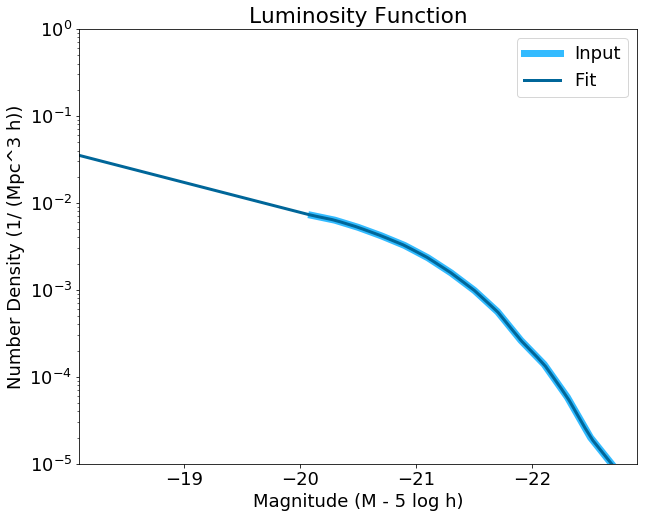

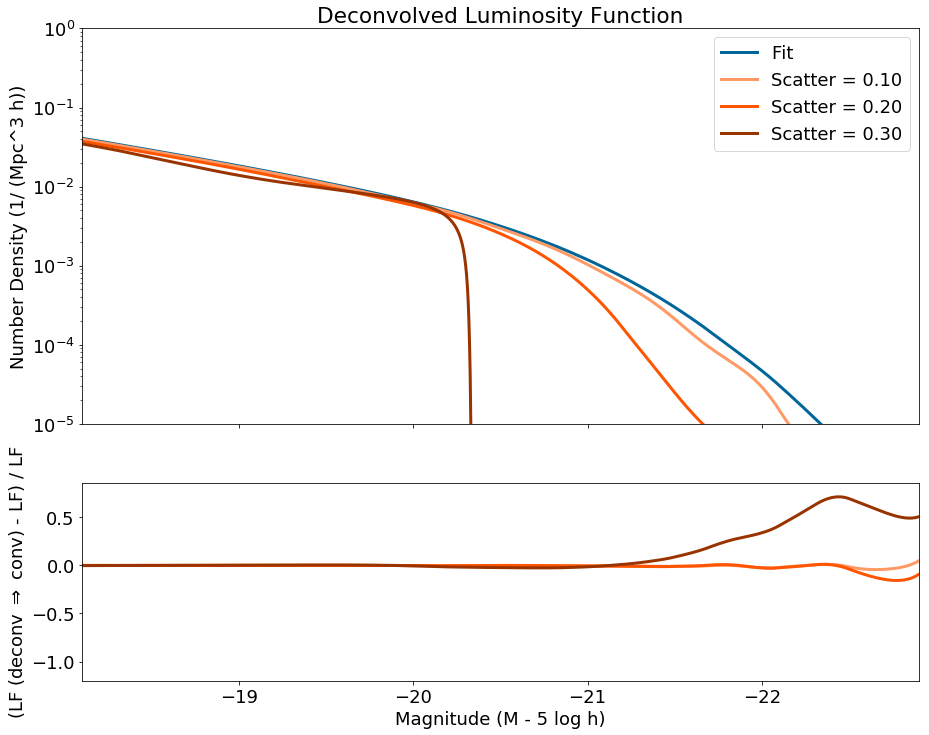

Scatter 0.10 catalog has 76063 galaxies


/u/ki/swagnerc/.local/lib/python3.7/site-packages/Corrfunc-2.3.1-py3.7-linux-x86_64.egg/Corrfunc/utils.py:916: UserWarning: One or more input array has non-native endianness!  A copy will be made with the correct endianness.
  warnings.warn("One or more input array has non-native endianness!  A copy will"\


Scatter 0.20 catalog has 76063 galaxies
Scatter 0.30 catalog has 76063 galaxies


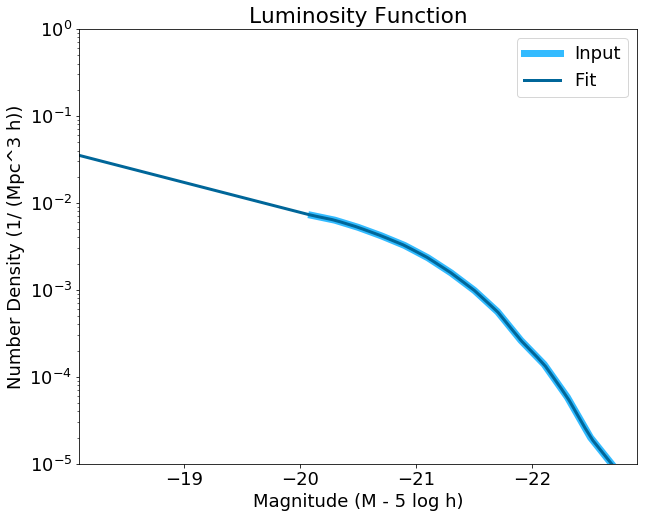

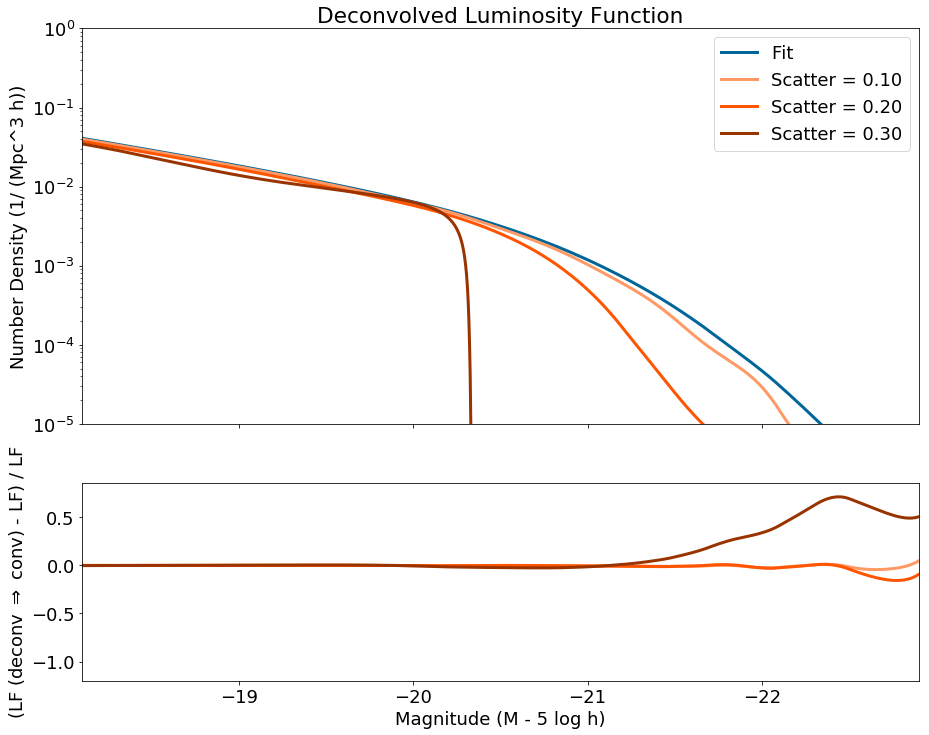

Scatter 0.10 catalog has 410433 galaxies
Scatter 0.20 catalog has 410433 galaxies
Scatter 0.30 catalog has 410433 galaxies


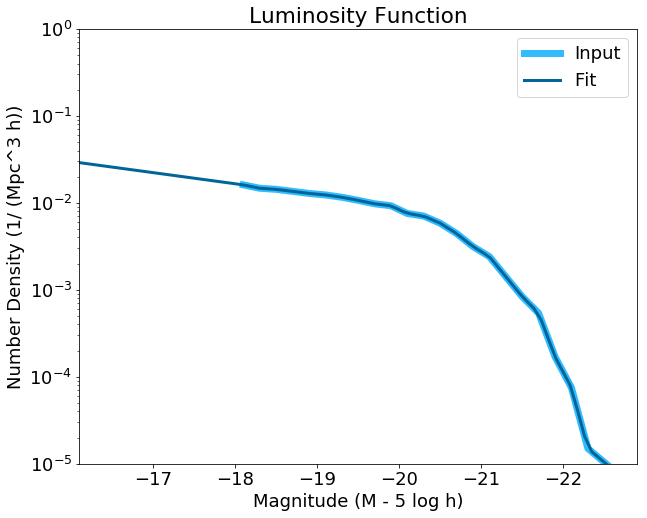

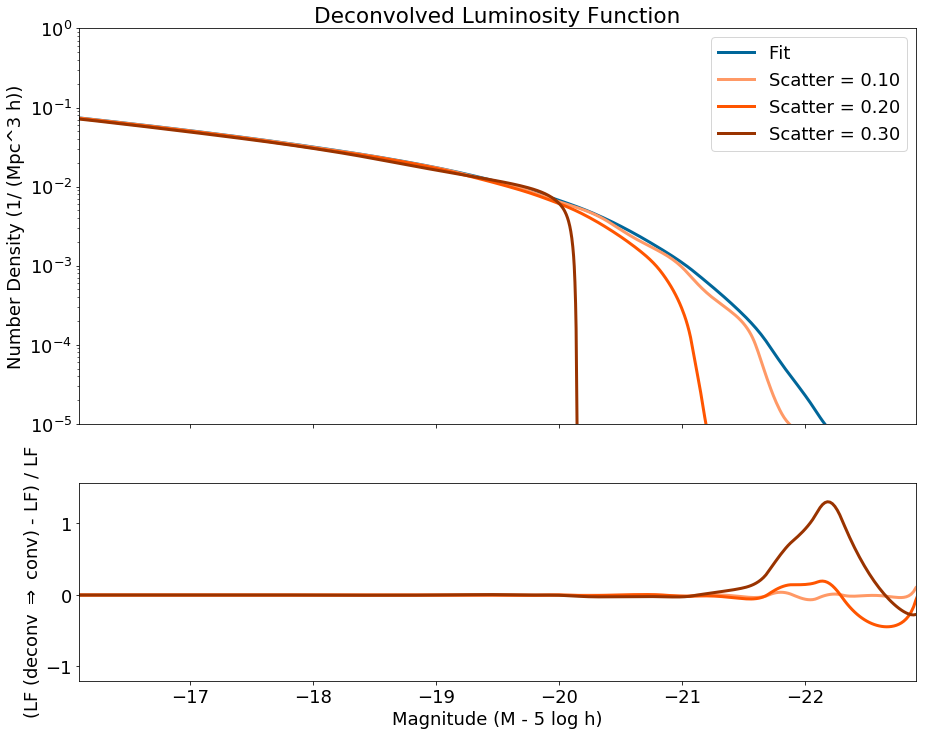

Scatter 0.10 catalog has 2030163 galaxies
Scatter 0.20 catalog has 2030163 galaxies
Scatter 0.30 catalog has 2030163 galaxies


In [3]:
wp_binneds = generate_wp(lf_list,halos,'vmax',wp_20[:,0],box_size,mag_cuts=mag_cuts,pimax=pimax,scatters=scatters,
                    deconv_repeat=deconv_repeat,verbose=True)

chi^2 is -154.084667


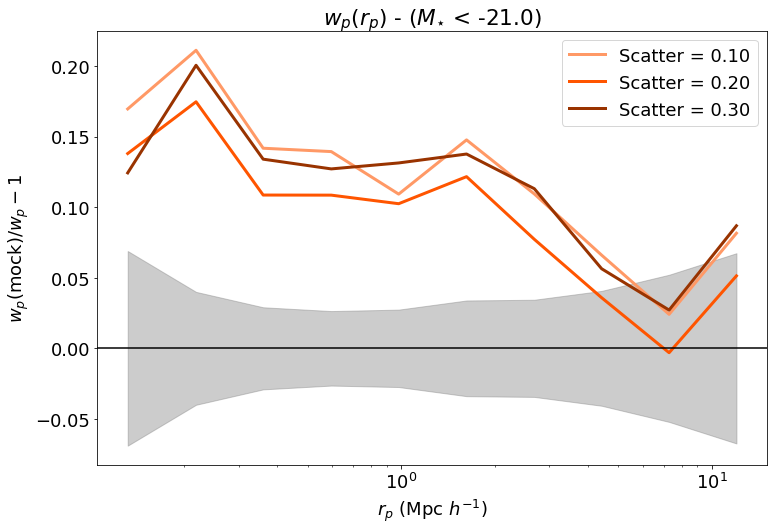

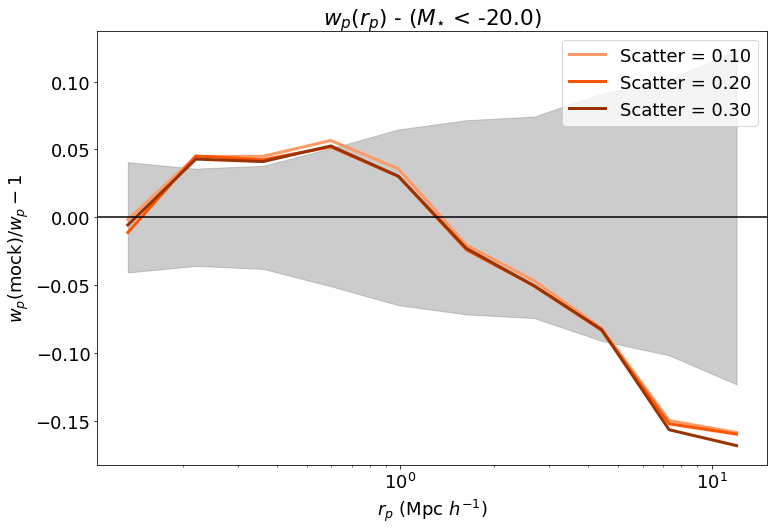

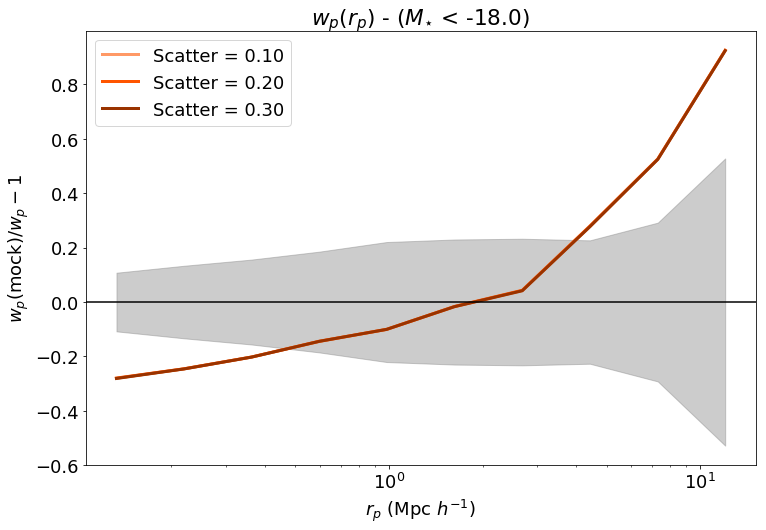

In [4]:
custom_blues_complement = ["#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300","#662200"]

# M_star < -21
plt.figure(figsize=(12,8))
legend = []
for wp_binned in wp_binneds[0]:
    plt.plot(wp_21[:,0],wp_binned/wp_21[:,1]-1,lw=3,c=custom_blues_complement[2*len(legend)])
    legend.append('Scatter = %.2f'%(scatters[len(legend)]))
plt.fill_between(wp_21[:,0],-np.sqrt(wp_21_var)/wp_21[:,1],np.sqrt(wp_21_var)/wp_21[:,1],alpha=0.4,color='grey')
plt.title('$w_p(r_p)$ - ($M_{\star}$ < %.1f)'%(mag_cuts[0]))
plt.legend(legend)
plt.ylabel('$w_p (\mathrm{mock}) / w_p - 1$')
plt.xlabel('$r_p \ (\mathrm{Mpc } \ h^{-1})$')
# plt.ylim([-1,1])
plt.xscale('log')
plt.axhline(0,c='k')

# M_star < -20
plt.figure(figsize=(12,8))
legend = []
for wp_binned in wp_binneds[1]:
    plt.plot(wp_20[:,0],wp_binned/wp_20[:,1]-1,lw=3,c=custom_blues_complement[2*len(legend)])
    legend.append('Scatter = %.2f'%(scatters[len(legend)]))
plt.fill_between(wp_20[:,0],-np.sqrt(wp_20_var)/wp_20[:,1],np.sqrt(wp_20_var)/wp_20[:,1],alpha=0.4,color='grey')
plt.title('$w_p(r_p)$ - ($M_{\star}$ < %.1f)'%(mag_cuts[1]))
plt.legend(legend)
plt.ylabel('$w_p (\mathrm{mock}) / w_p - 1$')
plt.xlabel('$r_p \ (\mathrm{Mpc } \ h^{-1})$')
# plt.ylim([-1,1])
plt.xscale('log')
plt.axhline(0,c='k')

# M_star < -18
plt.figure(figsize=(12,8))
legend = []
for wp_binned in wp_binneds[2]:
    plt.plot(wp_18[:,0],wp_binned/wp_18[:,1]-1,lw=3,c=custom_blues_complement[2*len(legend)])
    legend.append('Scatter = %.2f'%(scatters[len(legend)]))
plt.fill_between(wp_18[:,0],-np.sqrt(wp_18_var)/wp_18[:,1],np.sqrt(wp_18_var)/wp_18[:,1],alpha=0.4,color='grey')
plt.title('$w_p(r_p)$ - ($M_{\star}$ < %.1f)'%(mag_cuts[2]))
plt.legend(legend)
plt.ylabel('$w_p (\mathrm{mock}) / w_p - 1$')
plt.xlabel('$r_p \ (\mathrm{Mpc } \ h^{-1})$')
# plt.ylim([-1,1])
plt.xscale('log')
plt.axhline(0,c='k')

print('chi^2 is %f'%(multivariate_normal.logpdf(wp_binned,wp_20[:,1],wp_20_cov)))

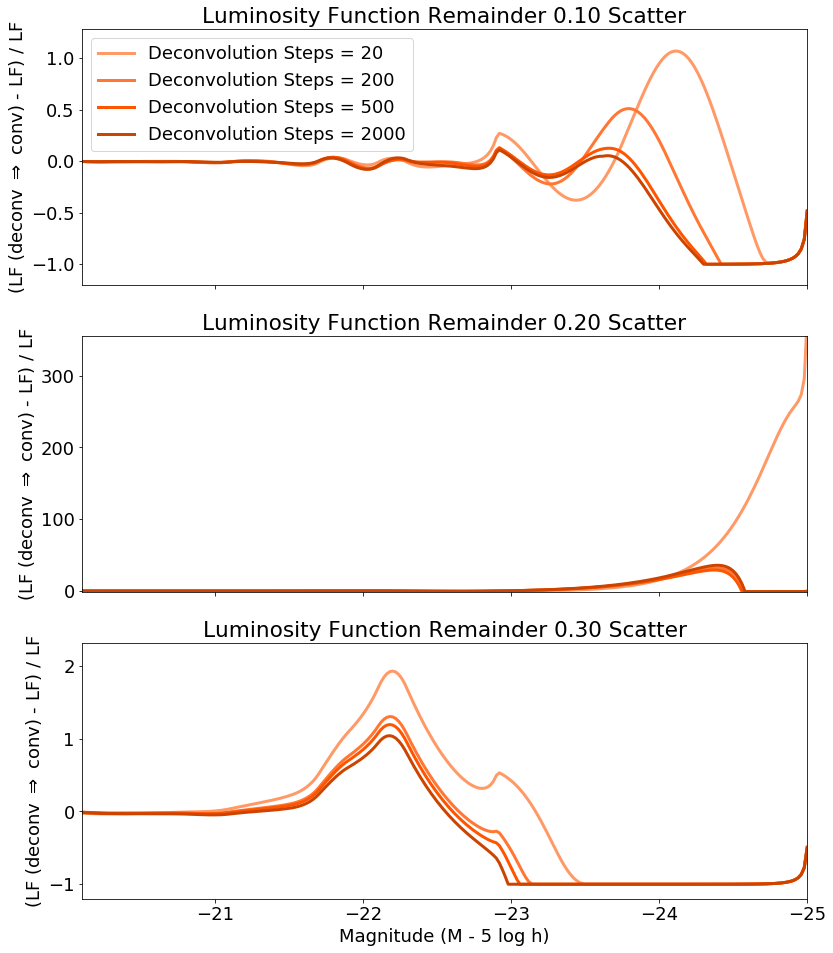

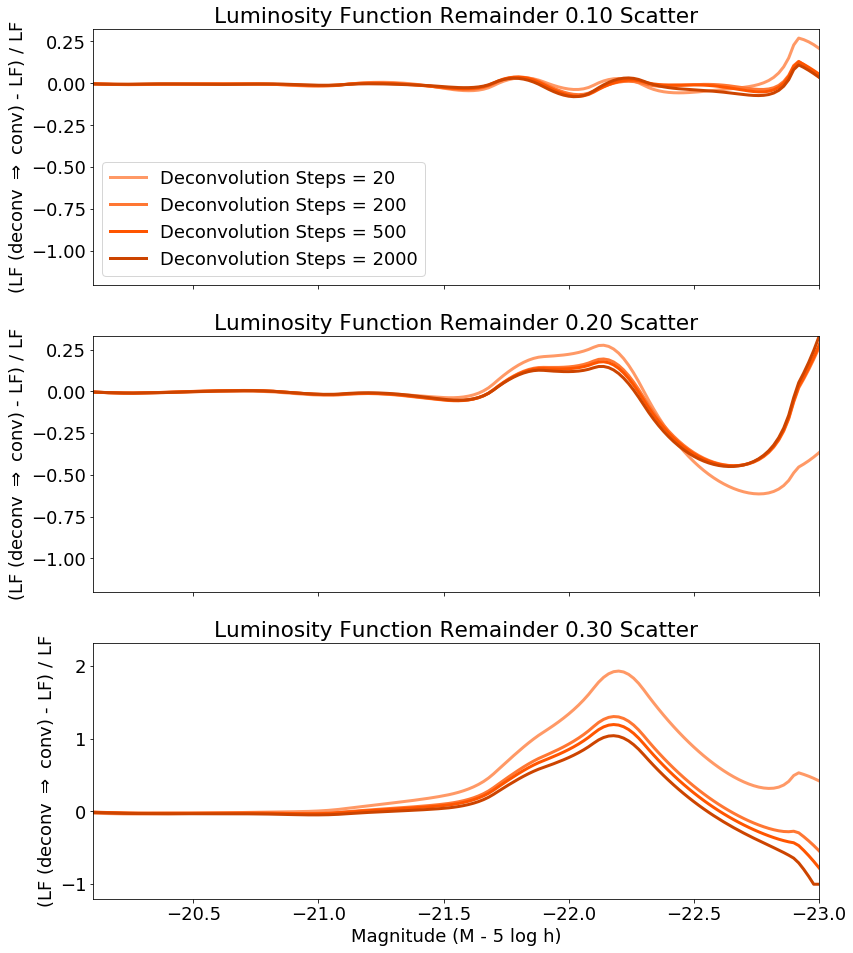

In [39]:
deconv_repeats = [20,200,500,2000]
comp_deconv_steps(lf_18,scatters,deconv_repeats,m_max=-25)
comp_deconv_steps(lf_18,scatters,deconv_repeats,m_max=-23)